In [ ]:
# Zach Quinn
# DSC 540
# 7 August 2020
# File Name: MS_5 
# File Description: Merges data frames into an SQL Lite data base. 
# File Function: Utilizes Pandas and SQL Lite to manipulate and combine data frames for EDA purposes.  

In [124]:
import sqlite3 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
# Read CSV data 
covid_csv = pd.read_csv('his_covid_dat.csv')

In [126]:
# Check first three rows of CSV flat file. 
covid_csv.head(3)

,Unnamed: 0,Report date,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths
0,0,6/10/20,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0
1,1,6/10/20,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0
2,2,6/10/20,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0


In [127]:
# Import and display data frame of data scraped from Wikipedia. 
covid_web = pd.read_csv('covid_notable_death_chart_clean.csv')
covid_web.head(3)

,Unnamed: 0,Date,Name,Age,Significance,Deceased in
0,0,25 January,Liang Wudong,60,Doctor of otorhinolaryngology (first death due...,China (Wuhan)
1,1,26 January,Wang Xianliang,62,Director of the Ethnic and Religious Affairs C...,China (Wuhan)
2,2,27 January,Yang Xiaobo,57,Mayor of Huangshi (2009–2014) and delegate to ...,China (Wuhan)


In [128]:
# Import and display first three rows of API data source. 
covid_api = pd.read_csv('covid_api.csv')
covid_api.head(3)

,Unnamed: 0,date,cases,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths
0,0,2019-12-31,0,0,Afghanistan,38041757.0,NaN,0,0
1,1,2020-01-01,0,0,Afghanistan,38041757.0,NaN,0,0
2,2,2020-01-02,0,0,Afghanistan,38041757.0,NaN,0,0


In [129]:
# Drop NA values.
covid_api.dropna(inplace=True)

In [130]:
# Display first three rows of API data. 
covid_api.head(3)

,Unnamed: 0,date,cases,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths
13,13,2020-01-13,0,0,Afghanistan,38041757.0,0.0,0,0
14,14,2020-01-14,0,0,Afghanistan,38041757.0,0.0,0,0
15,15,2020-01-15,0,0,Afghanistan,38041757.0,0.0,0,0


In [131]:
# Create COVID_race data base and establish cursor object. 
con = sqlite3.connect('covid_race.db')
cursor = con.cursor()

In [132]:
# Convert CSV file to SQL Lite and read SQL Lite query. 
covid_csv.to_sql("CSV", con, if_exists='replace', index=False)
pd.read_sql('select * from CSV', con)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Unnamed: 0,Report date,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths
0,0,6/10/20,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0
1,1,6/10/20,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0
2,2,6/10/20,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0
3,3,6/10/20,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0
4,4,6/10/20,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0
...,...,...,...,...,...,...,...,...,...,...,...
1759,4749,6/10/20,Puerto Rico,85 years and over,Hispanic or Latino,25.0,397.0,24.0,10.0,436.0,2946.0
1760,4750,6/10/20,Puerto Rico,Under 1 year,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
1761,4751,6/10/20,Puerto Rico,1-4 years,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
1762,4752,6/10/20,Puerto Rico,5-14 years,Unknown,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
# Convert web data to SQL Lite and read query. 
covid_web.to_sql("WEB", con, if_exists='replace', index=False)
pd.read_sql('select * from WEB', con)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Unnamed: 0,Date,Name,Age,Significance,Deceased in
0,0,25 January,Liang Wudong,60,Doctor of otorhinolaryngology (first death due...,China (Wuhan)
1,1,26 January,Wang Xianliang,62,Director of the Ethnic and Religious Affairs C...,China (Wuhan)
2,2,27 January,Yang Xiaobo,57,Mayor of Huangshi (2009–2014) and delegate to ...,China (Wuhan)
3,3,6 February,Qiu Jun,72,Bodybuilder,China (Wuhan)
4,4,7 February,Hong Ling,53,Professor of genetics at Huazhong University o...,China (Wuhan)
...,...,...,...,...,...,...
614,614,2 August,Tootie Robbins,62,American football player,United States (Chandler)
615,615,2 August,Satyanarayan Singh,77,Member of the Bihar Legislative Assembly (1990...,India (Patna)
616,616,3 August,ATM Alamgir,70,Member of the Jatiya Sangsad (1991–1996),Bangladesh (Dhaka)
617,617,3 August,Dani Anwar,52,Senator (2009–2014),Indonesia (Jakarta)


In [134]:
# Convert API data frame to SQL and query COVID_race data base. 
covid_api.to_sql("API", con, if_exists='replace', index=False)
pd.read_sql('select * from API', con)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Unnamed: 0,date,cases,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths
0,13,2020-01-13,0,0,Afghanistan,38041757.0,0.000000,0,0
1,14,2020-01-14,0,0,Afghanistan,38041757.0,0.000000,0,0
2,15,2020-01-15,0,0,Afghanistan,38041757.0,0.000000,0,0
3,16,2020-01-16,0,0,Afghanistan,38041757.0,0.000000,0,0
4,17,2020-01-17,0,0,Afghanistan,38041757.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...
31527,34308,2020-08-01,77,14,Zimbabwe,14645473.0,11.942257,3169,67
31528,34309,2020-08-02,490,2,Zimbabwe,14645473.0,14.891974,3659,69
31529,34310,2020-08-03,262,1,Zimbabwe,14645473.0,15.772792,3921,70
31530,34311,2020-08-04,154,10,Zimbabwe,14645473.0,16.127851,4075,80


In [135]:
# Create first query from single table: API. 
cumulative_query = pd.read_sql_query(''' SELECT * FROM API WHERE "14_day_cumulative_rate" > 10 ''', con)
# Print all entries where the 14 day cumulative rate is greater than 10.00. 
print(cumulative_query)

       Unnamed: 0        date  cases  deaths      country  population  \
0             127  2020-05-16   1063      32  Afghanistan  38041757.0   
1             128  2020-05-17      0       0  Afghanistan  38041757.0   
2             129  2020-05-18    262       1  Afghanistan  38041757.0   
3             130  2020-05-19    408       4  Afghanistan  38041757.0   
4             131  2020-05-20    581       5  Afghanistan  38041757.0   
...           ...         ...    ...     ...          ...         ...   
10655       34308  2020-08-01     77      14     Zimbabwe  14645473.0   
10656       34309  2020-08-02    490       2     Zimbabwe  14645473.0   
10657       34310  2020-08-03    262       1     Zimbabwe  14645473.0   
10658       34311  2020-08-04    154      10     Zimbabwe  14645473.0   
10659       34312  2020-08-05    146       1     Zimbabwe  14645473.0   

       14_day_cumulative_rate  cumlative_cases  cumulative_deaths  
0                   10.690884             6402         

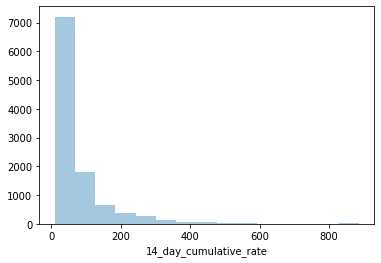

In [136]:
# Create a distributino plot without KDE. 
sns.distplot(cumulative_query['14_day_cumulative_rate'], kde=False, bins=15)

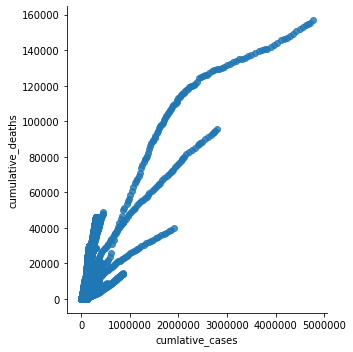

In [137]:
# Create LM plot to chart cumulative cases vs. cumulative deaths based on a worldwide data API. 
sns.lmplot(x='cumlative_cases', y='cumulative_deaths', data=cumulative_query,
           fit_reg=False)

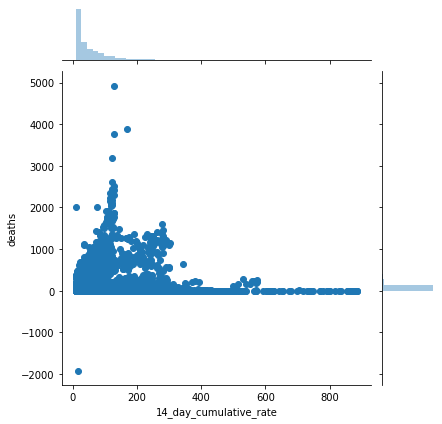

In [138]:
# Create joint plot of 14 day cumulative rate vs. deaths. 
sns.jointplot(x = '14_day_cumulative_rate', y = 'deaths', data = cumulative_query)

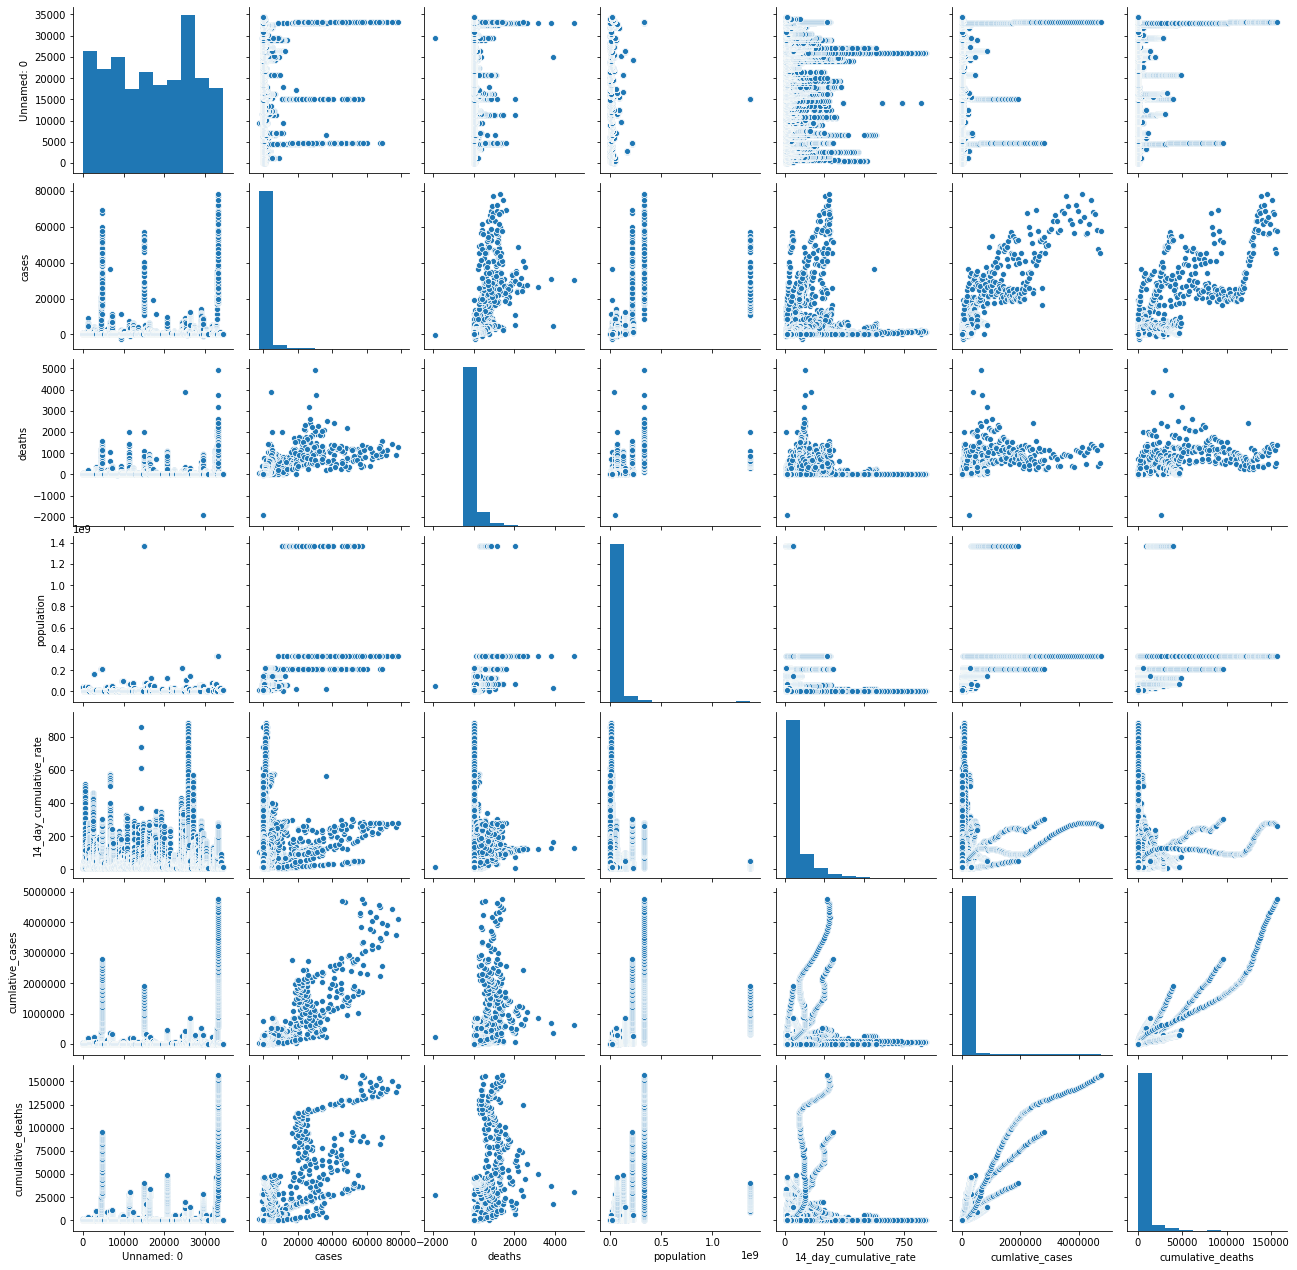

In [139]:
# Create pair plot to demonstrate plotting possibilities with queried data. 
sns.pairplot(cumulative_query)

In [140]:
# Combine all three sources using Pandas concat command.
covid_three = pd.concat([covid_csv, covid_api, covid_web])

In [141]:
# Display first five rows. 
covid_three.head()

,Unnamed: 0,Report date,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",...,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,0,6/10/20,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6/10/20,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6/10/20,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6/10/20,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6/10/20,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# Delte unnamed row. 
del covid_three['Unnamed: 0']

In [143]:
# Display updated data frame. 
covid_three.head()

,Report date,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths,...,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,6/10/20,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6/10/20,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/10/20,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/10/20,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/10/20,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# Examine remaining null values for each column. 
covid_three.isna().sum()

Report date                                 32151
State                                       32151
Age                                         31540
Race                                        32151
COVID-19 Deaths                             32151
Pneumonia Deaths                            32151
Influenza Deaths                            32151
Pneumonia and COVID-19 Deaths               32151
Pneumonia, Influenza, or COVID-19 Deaths    32151
Total Deaths                                32151
date                                         2383
cases                                        2383
deaths                                       2383
country                                      2383
population                                   2383
14_day_cumulative_rate                       2383
cumlative_cases                              2383
cumulative_deaths                            2383
Date                                        33296
Name                                        33296


In [145]:
# Impute NAs with zero to avoid losing columns entirely. 
covid_three.fillna(0)

,Report date,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths,...,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,6/10/20,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
1,6/10/20,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
2,6/10/20,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
3,6/10/20,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
4,6/10/20,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,0,0,62,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,2 August,Tootie Robbins,American football player,United States (Chandler)
615,0,0,77,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,2 August,Satyanarayan Singh,Member of the Bihar Legislative Assembly (1990...,India (Patna)
616,0,0,70,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,3 August,ATM Alamgir,Member of the Jatiya Sangsad (1991–1996),Bangladesh (Dhaka)
617,0,0,52,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,3 August,Dani Anwar,Senator (2009–2014),Indonesia (Jakarta)


In [146]:
# Delete 'report date' because it was throwing a duplicate error with 'date' and it is irrelevant to analysis.
del covid_three['Report date']

In [147]:
# Display first five rows. 
covid_three.head()

,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths,date,...,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
covid_three = covid_three.fillna(0)

In [149]:
covid_three.head()

,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths,date,...,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
1,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
2,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
3,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
4,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0


In [150]:
# Delete 'date' to address duplicate error message. 
del covid_three['date']

In [151]:
# Create new table based on combined data sources and reset index. 
covid_three.to_sql("COVID", con, if_exists='replace', index=False)
# Query data base to read table. 
pd.read_sql('select * from COVID', con)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths,cases,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
1,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
2,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
3,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
4,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33910,0,62,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2 August,Tootie Robbins,American football player,United States (Chandler)
33911,0,77,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2 August,Satyanarayan Singh,Member of the Bihar Legislative Assembly (1990...,India (Patna)
33912,0,70,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3 August,ATM Alamgir,Member of the Jatiya Sangsad (1991–1996),Bangladesh (Dhaka)
33913,0,52,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3 August,Dani Anwar,Senator (2009–2014),Indonesia (Jakarta)


In [152]:
# Create query to determine data for individuals younger than 50. 
age_query = pd.read_sql_query(''' SELECT * FROM COVID WHERE "Age" < 50 ''', con)
# Display aggregated data. 
print(age_query)

            State          Age                Race  COVID-19 Deaths  \
0      All states    1-4 years  Non-Hispanic White              1.0   
1      All states   5-14 years  Non-Hispanic White              2.0   
2      All states  15-24 years  Non-Hispanic White             23.0   
3      All states  25-34 years  Non-Hispanic White            110.0   
4      All states  35-44 years  Non-Hispanic White            245.0   
...           ...          ...                 ...              ...   
32613           0          105                   0              0.0   
32614           0            0                   0              0.0   
32615           0           40                   0              0.0   
32616           0          101                   0              0.0   
32617           0            0                   0              0.0   

       Pneumonia Deaths  Influenza Deaths  Pneumonia and COVID-19 Deaths  \
0                  16.0              18.0                            1.

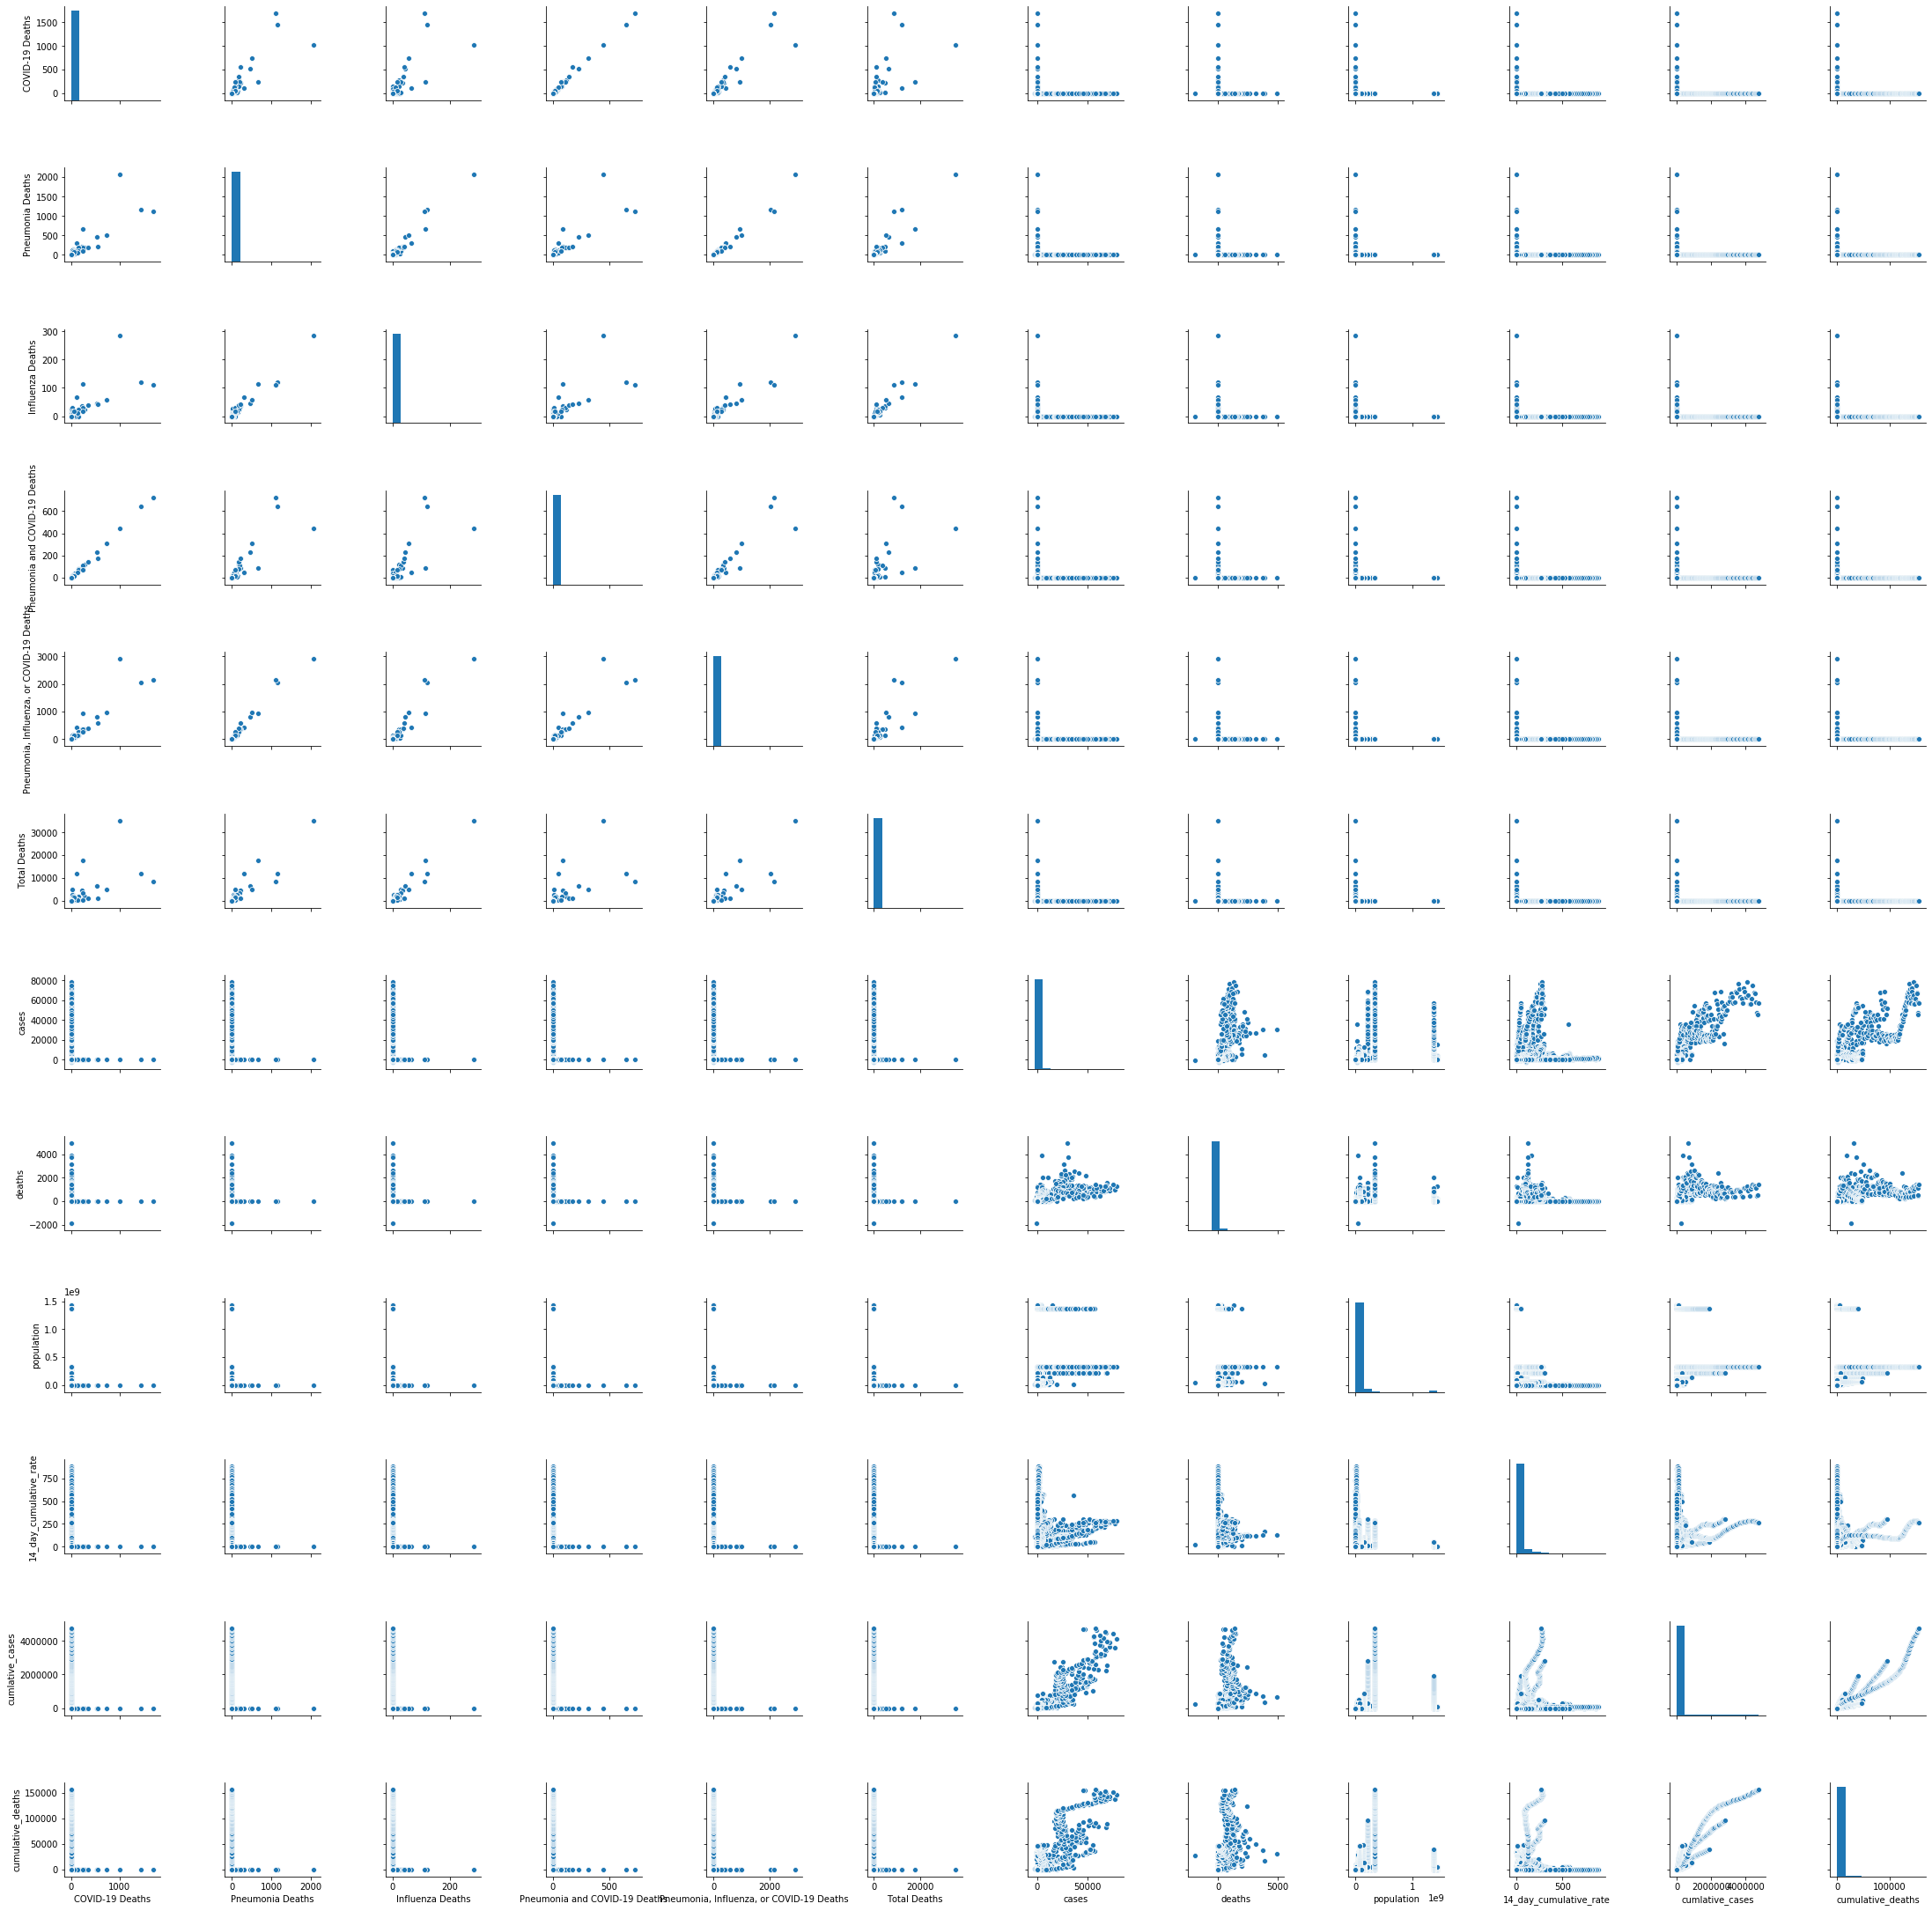

In [153]:
# Plot pairplot for all three files relevant to younger than 50 query. 
sns.pairplot(age_query)

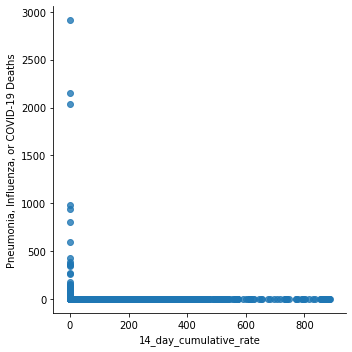

In [154]:
# Plot LM plot based on data from API and CSV data values.
sns.lmplot(x='14_day_cumulative_rate', y='Pneumonia, Influenza, or COVID-19 Deaths', data=age_query,
           fit_reg=False)

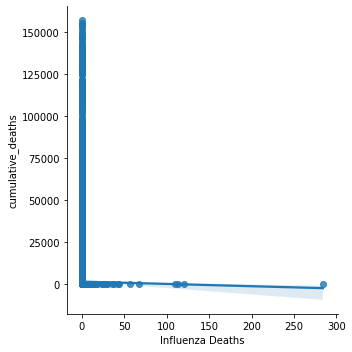

In [155]:
# Plot LM graph from API and CSVfile. 
sns.lmplot(x = 'Influenza Deaths', y = 'cumulative_deaths', data = age_query)